

# Pandas and matplotlib practice with IMDb Data

---

For this unit project, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with `pandas`.

The notebook is split into basic, intermediate, and advanced sections.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [4]:
movies = pd.read_csv('imdb_1000.csv')

#movies = pd.read_csv('imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [5]:
# Answer: This is 0 indexed
movies.shape

(979, 6)

#### Check the data type of each column.

In [6]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [7]:
# Answer:
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [8]:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [9]:
# Answer:
sort_df = movies.sort_values('duration')
sort_df.head()

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."


In [10]:
sort_df.tail()

,star_rating,title,content_rating,genre,duration,actors_list
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

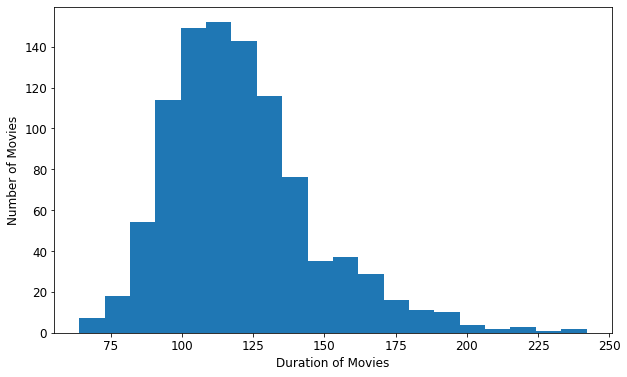

In [11]:
# Answer:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
# movies['duration'].value_counts().plot(kind= "barh")

plt.hist(movies['duration'], bins=20)
plt.ylabel('Number of Movies')
plt.xlabel('Duration of Movies')
plt.show()

#### Use a box plot to display that same data.

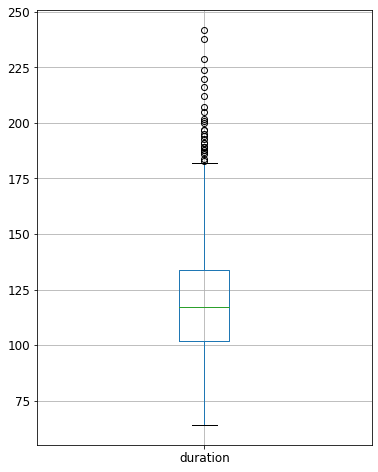

In [12]:
# Answer:
plt.rcParams['figure.figsize'] = (6, 8)
plt.rcParams['font.size'] = 12
boxplot = movies.boxplot(column=['duration'])

## Intermediate level

#### Count how many movies have each of the content ratings.

In [13]:
# Answer:
#movies.head()

movies["content_rating"].isnull().sum()

3

In [14]:
movies["content_rating"].value_counts()   

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualisation to display that same data, including a title and axis labels.

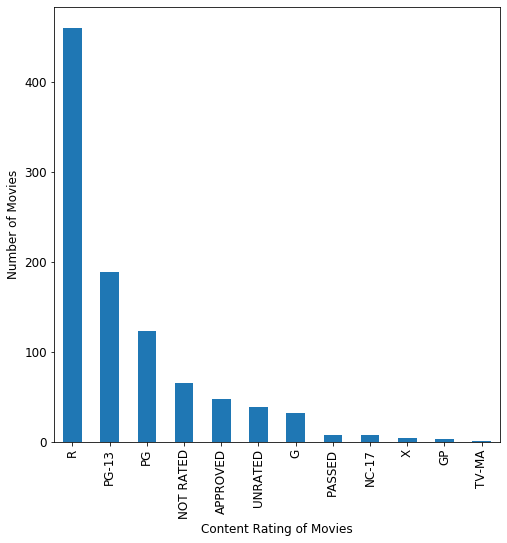

In [15]:
# Answer:

plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['font.size'] = 12

movies["content_rating"].value_counts().plot(kind='bar')
plt.ylabel('Number of Movies')
plt.xlabel('Content Rating of Movies')
plt.show()

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [16]:
# Answer:
#df = movies['content_rating'].replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED')
#df.head()

movies['content_rating'].replace(
    to_replace=['NOT RATED', 'APPROVED', 'PASSED', 'GP'],
    value='UNRATED',
    inplace=True
)

movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [17]:
# Answer:

movies['content_rating'].replace(
    to_replace=['X', 'TV-MA'],
    value='NC-17',
    inplace=True
)

movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Count the number of missing values in each column.

In [18]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [19]:
# Answer:
null_data = movies[movies.isnull().any(axis=1)]
null_data

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [20]:
movies = movies.fillna('PG-13')

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [21]:
# Answer:
greater_than = movies[movies['duration'] >= 2*60]

less_than = movies[movies['duration'] < 2*60]
less_than.head()

,star_rating,title,content_rating,genre,duration,actors_list
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
23,8.7,The Usual Suspects,R,Crime,106,"[u'Kevin Spacey', u'Gabriel Byrne', u'Chazz Pa..."
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
27,8.6,The Silence of the Lambs,R,Drama,118,"[u'Jodie Foster', u'Anthony Hopkins', u'Lawren..."
28,8.6,Leon: The Professional,R,Crime,110,"[u'Jean Reno', u'Gary Oldman', u'Natalie Portm..."


In [22]:
gmean = greater_than['star_rating'].mean()

In [23]:
lmean = less_than['star_rating'].mean()

In [24]:
gmean, lmean

(7.948898678414082, 7.838666666666657)

#### Use a visualisation to detect whether there is a relationship between duration and star rating.

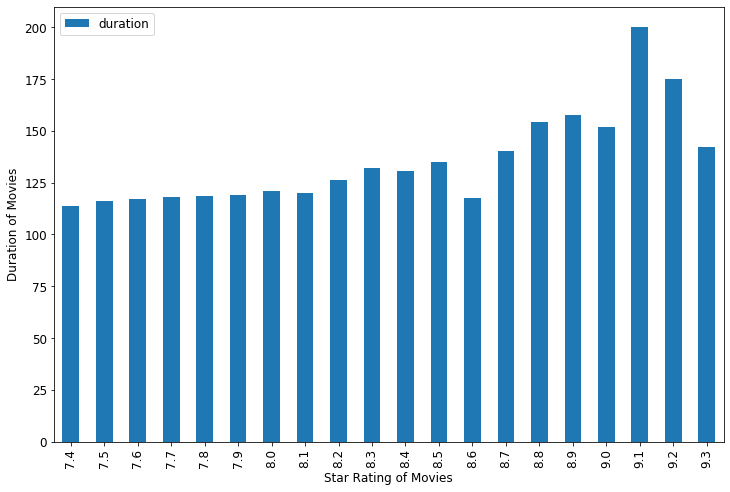

In [25]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

movies.groupby('star_rating').mean().plot(kind='bar')
plt.ylabel('Duration of Movies')
plt.xlabel('Star Rating of Movies')
plt.show()

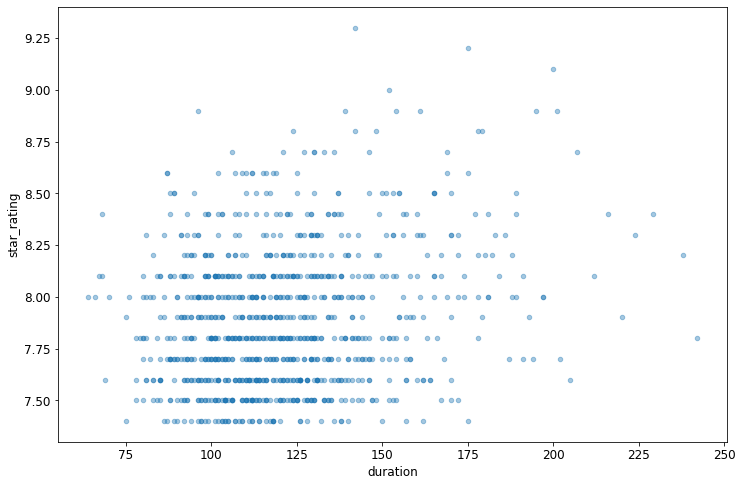

In [26]:
movies.plot(kind='scatter', x='duration', y='star_rating', alpha=0.4)

#### Calculate the average duration for each genre.

In [27]:
# Answer:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

In [28]:
movies['content_rating'].value_counts()

R          460
PG-13      192
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

## Advanced level

#### Visualise the relationship between content rating and duration.

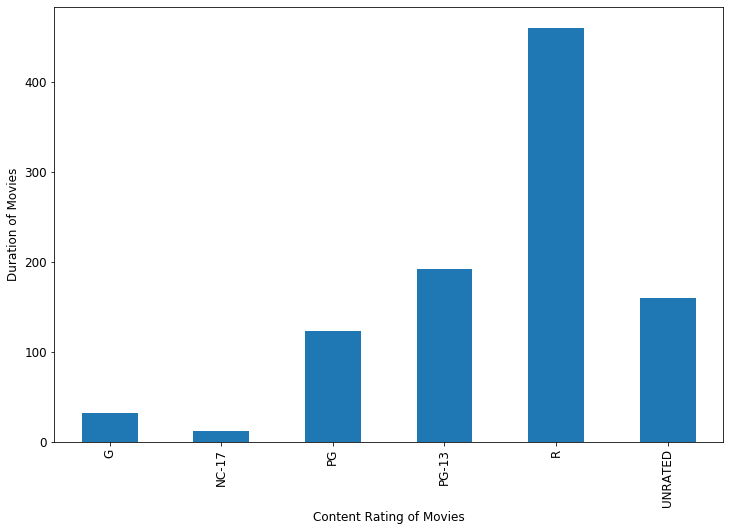

In [29]:
# # Answer:
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

movies.groupby('content_rating')['duration'].count().plot(kind='bar')
plt.ylabel('Duration of Movies')
plt.xlabel('Content Rating of Movies')
plt.show()

#movies.groupby('content_rating')['duration'].count()

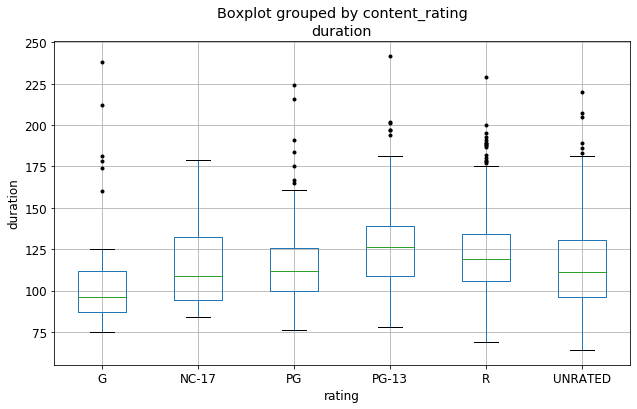

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))

movies.boxplot(column='duration', by='content_rating', figsize=(11,5), sym='k.', ax=ax)

ax.set_xlabel('rating')
ax.set_ylabel('duration')

plt.show()

#### Determine the top rated movie (by star rating) for each genre.

In [31]:
movies.loc[movies['genre']=='Action'].sort_values('star_rating',ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [32]:
# OPTION ONE - SUCCINCT
# + According to the documentation, groupby PRESERVES ROW ORDER.
# + So, sorting by value before the groupby guarantees 
#      each group is ordered by rating.
# + Downside: Movies tied for highest rating not shown.

DISPLAY_COLS = ['genre', 'title', 'star_rating']

movies_sorted = movies.sort_values('star_rating', ascending=False)
movies_sorted.groupby('genre').head(1)[DISPLAY_COLS]

,genre,title,star_rating
0,Crime,The Shawshank Redemption,9.3
3,Action,The Dark Knight,9.0
5,Drama,12 Angry Men,8.9
6,Western,"The Good, the Bad and the Ugly",8.9
7,Adventure,The Lord of the Rings: The Return of the King,8.9
8,Biography,Schindler's List,8.9
39,Horror,Psycho,8.6
38,Mystery,Rear Window,8.6
35,Comedy,Modern Times,8.6
30,Animation,Spirited Away,8.6


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [33]:
# Answer:
pd.concat(g for _, 
          g in movies.groupby("title") 
          if len(g) > 1)

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [34]:
# Answer:
movies.genre.value_counts()

top_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']

movies[movies.genre.isin(top_genres)].groupby('genre').mean()[['star_rating']]
#movies.groupby('genre').mean()[['star_rating']]


,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [35]:
# Answer:
value_counts = movies.genre.value_counts()
top = value_counts[value_counts >= 10].index

movies[movies.genre.isin(top)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [36]:
# Answer:
booleanSeries = movies.genre.value_counts() #count genres for number of films
booleanSeries = booleanSeries >= 10
booleanSeries

movieMeans = movies.groupby('genre').star_rating.mean()
movieMeans[booleanSeries]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [37]:
# Answer:

genre_rating = movies.groupby('genre').star_rating.agg(['count', 'mean'])
genre_rating[genre_rating['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000
